In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data_path = 'owid-covid-data.csv'

In [3]:
try:
    df = pd.read_csv(data_path)
    print("Dataset loaded successfully. First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found. Please download the dataset and place it in the same directory as this script.")
    print("You can find the dataset at: https://covid.ourworldindata.org/data/owid-covid-data.csv")
    exit()

Dataset loaded successfully. First 5 rows:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_

In [4]:


# 2. Clean the data (handle missing values, filter required columns).

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Fill NaN values in numerical columns with 0 or an appropriate value
# For 'new_cases', 'total_cases', 'total_deaths', 'total_recoveries', 'population'
# It's safer to fill with 0 for cases/deaths/recoveries if NaN means no new cases/deaths/recoveries
# For population, it might be better to drop rows if population is critical and missing

# Let's focus on key columns and fill NaNs for numerical data that will be used in calculations
columns_to_fill_na = ['new_cases', 'total_cases', 'total_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions', 'total_tests', 'new_tests', 'positive_rate', 'tests_per_case', 'tests_units', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'reproduction_rate', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million']

for col in columns_to_fill_na:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# For 'total_recoveries', this column is often missing or not consistently updated in many datasets.
# If it's not available, we might need to skip visualizations that rely on it or find an alternative source.
# Let's check if 'total_recoveries' exists and fill if it does.
if 'total_recoveries' in df.columns:
    df['total_recoveries'] = df['total_recoveries'].fillna(0)
else:
    print("Warning: 'total_recoveries' column not found. Some visualizations might be skipped or adjusted.")

# Filter required columns (date, location, total_cases, new_cases, total_deaths, population, continent)
# Ensure all specified columns exist before selecting
required_columns = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'population', 'continent']

# Check if all required columns are in the DataFrame, if not, adjust
existing_columns = [col for col in required_columns if col in df.columns]

df_filtered = df[existing_columns].copy()

# Drop rows where 'location' or 'date' is missing, as these are critical for grouping and trends
df_filtered.dropna(subset=['date', 'location'], inplace=True)

print("\nData after cleaning and filtering (first 5 rows):")
print(df_filtered.head())
print(f"Shape after cleaning: {df_filtered.shape}")



Data after cleaning and filtering (first 5 rows):
        date     location  total_cases  new_cases  total_deaths  population  \
0 2020-01-05  Afghanistan          0.0        0.0           0.0    41128772   
1 2020-01-06  Afghanistan          0.0        0.0           0.0    41128772   
2 2020-01-07  Afghanistan          0.0        0.0           0.0    41128772   
3 2020-01-08  Afghanistan          0.0        0.0           0.0    41128772   
4 2020-01-09  Afghanistan          0.0        0.0           0.0    41128772   

  continent  
0      Asia  
1      Asia  
2      Asia  
3      Asia  
4      Asia  
Shape after cleaning: (429435, 7)



Generating: Top 10 countries by total cases...


/var/folders/c0/db_w__ls7n5164p0q3wyynzw0000gn/T/ipykernel_9815/2858540704.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_cases', y='location', data=top_10_countries, palette='viridis')


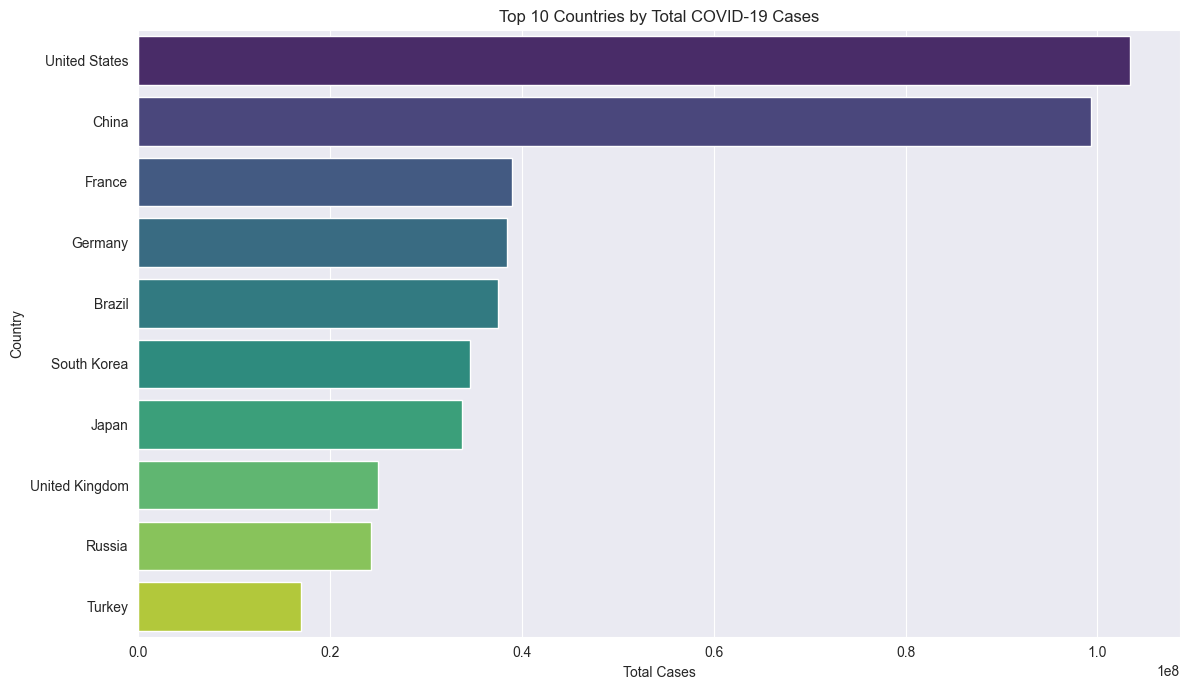


Generating: New cases trend over time for selected countries...


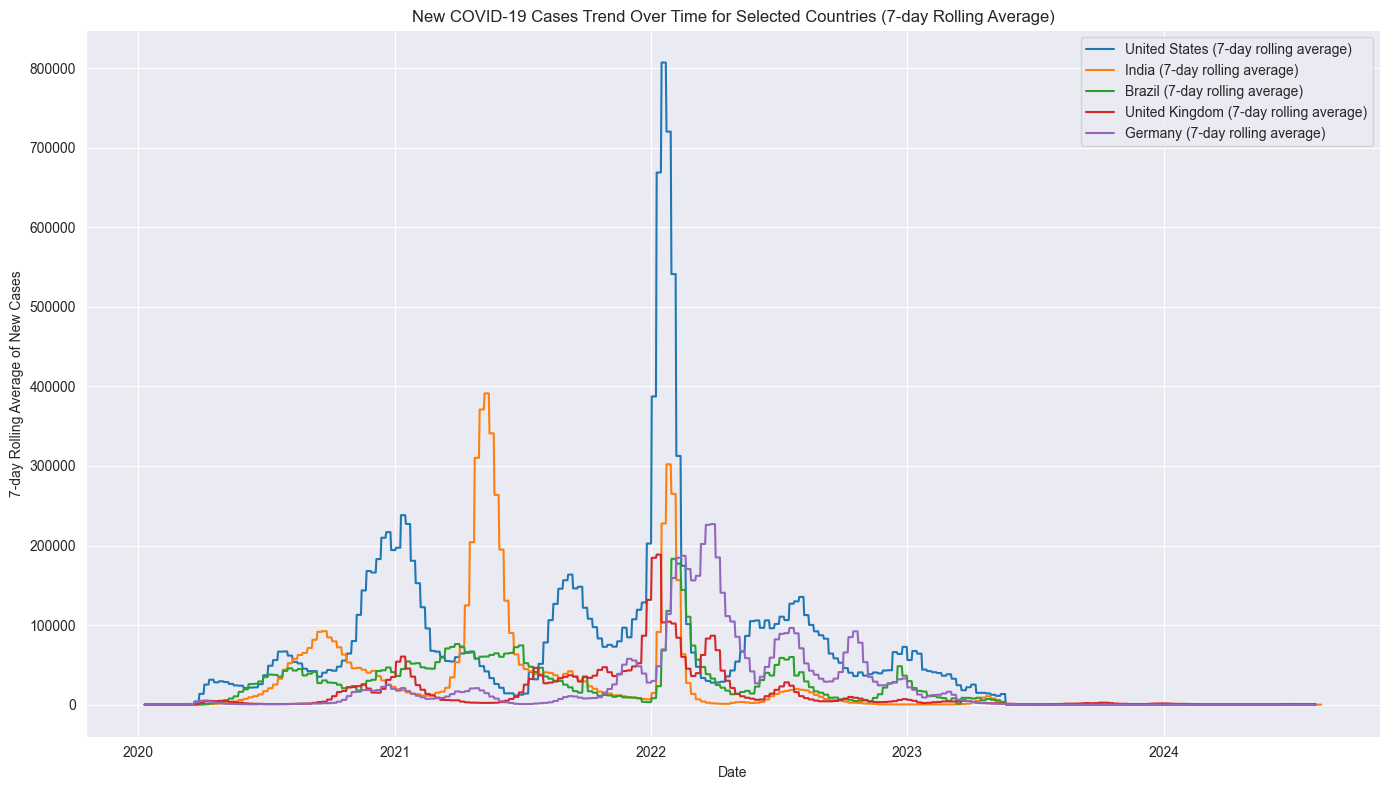


Generating: Bar chart - Total deaths vs. total recoveries...
Skipping 'Total deaths vs. total recoveries' chart: 'total_recoveries' column is not available in the dataset.


In [5]:
# 3. Create visualizations:

#    o Top 10 countries by total cases
print("\nGenerating: Top 10 countries by total cases...")
# Get the latest data for each location
latest_data = df_filtered.sort_values('date').groupby('location').tail(1)

# Exclude continents and 'World' from locations
# Continents are typically in the 'continent' column, but some datasets might list them as locations.
# We'll filter out common non-country entries.
non_country_locations = ['World', 'European Union', 'Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
latest_data_countries = latest_data[~latest_data['location'].isin(non_country_locations)]

# Sort by total_cases and get the top 10
top_10_countries = latest_data_countries.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='total_cases', y='location', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#    o New cases trend over time for selected countries
print("\nGenerating: New cases trend over time for selected countries...")
selected_countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']

plt.figure(figsize=(14, 8))
for country in selected_countries:
    country_df = df_filtered[df_filtered['location'] == country]
    # Ensure data is sorted by date for proper trend plotting
    country_df = country_df.sort_values('date')
    plt.plot(country_df['date'], country_df['new_cases'].rolling(window=7).mean(), label=f'{country} (7-day rolling average)')

plt.title('New COVID-19 Cases Trend Over Time for Selected Countries (7-day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('7-day Rolling Average of New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#    o Bar chart: Total deaths vs. total recoveries
print("\nGenerating: Bar chart - Total deaths vs. total recoveries...")

if 'total_recoveries' in df_filtered.columns:
    # Aggregate the latest total deaths and recoveries globally or for a specific region
    # For simplicity, let's take the latest available global totals (or sum across countries)
    # This might require careful aggregation if the dataset has cumulative values per day per country.
    # A common approach is to get the max value for 'World' or sum up the latest values for all countries.

    # Let's try to get the latest 'World' data if available, otherwise sum up latest country data.
    world_data = df_filtered[df_filtered['location'] == 'World'].sort_values('date').tail(1)

    if not world_data.empty:
        total_deaths_global = world_data['total_deaths'].iloc[0]
        total_recoveries_global = world_data['total_recoveries'].iloc[0]
    else:
        # If 'World' data is not available, sum up the latest values from all countries
        # This assumes that the latest entry for each country represents its current total.
        latest_country_data = df_filtered[~df_filtered['location'].isin(non_country_locations)].sort_values('date').groupby('location').tail(1)
        total_deaths_global = latest_country_data['total_deaths'].sum()
        total_recoveries_global = latest_country_data['total_recoveries'].sum()

    data_to_plot = pd.DataFrame({
        'Category': ['Total Deaths', 'Total Recoveries'],
        'Count': [total_deaths_global, total_recoveries_global]
    })

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Count', data=data_to_plot, palette=['salmon', 'lightgreen'])
    plt.title('Global Total Deaths vs. Total Recoveries')
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping 'Total deaths vs. total recoveries' chart: 'total_recoveries' column is not available in the dataset.")


In [6]:
# 4. Group data by date/country to show growth trend.
print("\nGrouping data by date/country to show growth trend...")
# This step is more about preparing data for trend analysis rather than a direct visualization.
# The previous new cases trend plot already shows growth over time for selected countries.
# We can create a grouped DataFrame that can be used for further analysis or specific country plots.

df_grouped_by_date_country = df_filtered.groupby(['date', 'location']).agg({
    'total_cases': 'max',
    'new_cases': 'sum',
    'total_deaths': 'max'
}).reset_index()

print("Grouped data (first 5 rows):")
print(df_grouped_by_date_country.head())


Grouping data by date/country to show growth trend...
Grouped data (first 5 rows):
        date   location  total_cases  new_cases  total_deaths
0 2020-01-01  Argentina          0.0        0.0           0.0
1 2020-01-01     Mexico          0.0        0.0           0.0
2 2020-01-02  Argentina          0.0        0.0           0.0
3 2020-01-02     Mexico          0.0        0.0           0.0
4 2020-01-03  Argentina          0.0        0.0           0.0



Generating: Line graph for India’s case growth...


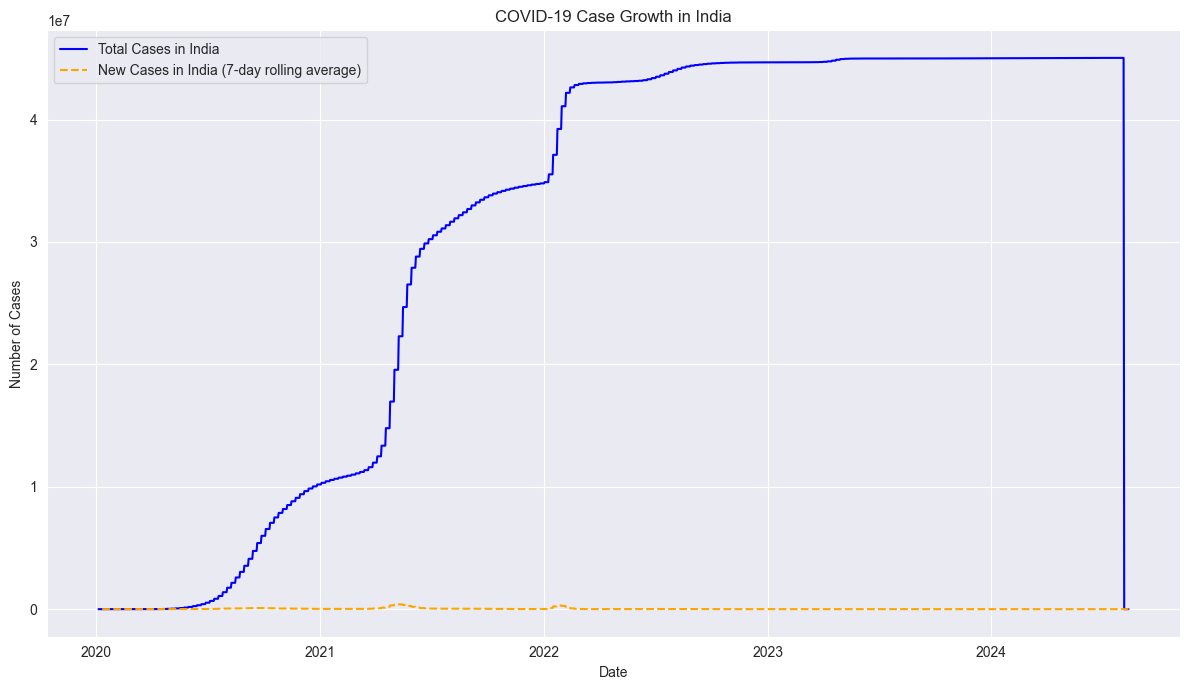

In [7]:
# 5. Create a line graph for India’s case growth.
print("\nGenerating: Line graph for India’s case growth...")
india_df = df_filtered[df_filtered['location'] == 'India'].sort_values('date')

plt.figure(figsize=(12, 7))
plt.plot(india_df['date'], india_df['total_cases'], label='Total Cases in India', color='blue')
plt.plot(india_df['date'], india_df['new_cases'].rolling(window=7).mean(), label='New Cases in India (7-day rolling average)', color='orange', linestyle='--')
plt.title('COVID-19 Case Growth in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# 6. Bonus: Calculate death rate:
print("\nCalculating death rate...")
# To calculate death rate, we'll use the latest available total_deaths and total_cases for each country.
# We need to be careful with division by zero if total_cases is 0.

# Get the latest data for each location again, similar to the top 10 countries visualization
latest_data_for_death_rate = df_filtered.sort_values('date').groupby('location').tail(1)

# Exclude non-country locations
latest_data_for_death_rate = latest_data_for_death_rate[~latest_data_for_death_rate['location'].isin(non_country_locations)]

# Calculate death rate, handling division by zero
latest_data_for_death_rate['death_rate'] = (
    latest_data_for_death_rate['total_deaths'] / latest_data_for_death_rate['total_cases']
) * 100

# Replace NaN or inf values that might result from division by zero or missing data with 0
latest_data_for_death_rate['death_rate'] = latest_data_for_death_rate['death_rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

print("Top 10 Countries by Death Rate (latest data):")
print(latest_data_for_death_rate.sort_values('death_rate', ascending=False)[['location', 'total_cases', 'total_deaths', 'death_rate']].head(10))

print("\nCOVID-19 Data Analysis script completed. Please run this script to generate the plots.")


Calculating death rate...
Top 10 Countries by Death Rate (latest data):
                      location  total_cases  total_deaths  death_rate
426086                   Yemen      11945.0        2159.0   18.074508
367607                   Sudan      63993.0        5046.0    7.885237
374303                   Syria      57423.0        3163.0    5.508246
355889                 Somalia      27334.0        1361.0    4.979147
302690                    Peru    4526977.0      220975.0    4.881293
107157                   Egypt     516023.0       24830.0    4.811801
245371                  Mexico    7619458.0      334551.0    4.390745
48559   Bosnia and Herzegovina     403666.0       16392.0    4.060783
212061                 Liberia       7930.0         294.0    3.707440
1673               Afghanistan     235214.0        7998.0    3.400308

COVID-19 Data Analysis script completed. Please run this script to generate the plots.
